# PyCaret

**Description:** An open-source low-code machine learning library in Python that automates the ML workflow.

## Key Features:
- Simplified model training and evaluation.
- Built-in feature engineering and selection.
- Hyperparameter tuning and ensemble methods.


In [1]:
pip install --upgrade pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 977.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.9 MB/s eta 0:00:00
   ━━

In [2]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *



# Load the 'tips' dataset from Seaborn
tips_data = sns.load_dataset('tips')

# Preprocessing: Create new features
tips_data['tip_percentage'] = (tips_data['tip'] / tips_data['total_bill']) * 100
tips_data['is_large_group'] = (tips_data['size'] >= 5).astype(int)

# Initialize the PyCaret environment
exp = setup(data=tips_data, target='tip', session_id=42,
            ignore_features=[],  # Adjust if you have any irrelevant features
            categorical_features=['sex', 'smoker', 'day', 'time'],  # Specify categorical features
            numeric_features=['total_bill', 'size', 'tip_percentage', 'is_large_group'])  # Numeric features

# Compare baseline models
best_model = compare_models()

# Get the best model's name and parameters
model_name = best_model.__class__.__name__
model_params = best_model.get_params()
print(f"Best Model: {model_name}")
print("Model Parameters:")
print(model_params)

# Make predictions on new data
predictions = predict_model(best_model)


# Display the predictions
print(predictions[['prediction_label', 'tip']])  # Use 'prediction_label' instead of 'Label'


,Description,Value
0,Session id,42
1,Target,tip
2,Target type,Regression
3,Original data shape,"(244, 9)"
4,Transformed data shape,"(244, 12)"
5,Transformed train set shape,"(170, 12)"
6,Transformed test set shape,"(74, 12)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2153,0.1163,0.3234,0.9323,0.0783,0.0760,0.1370
et,Extra Trees Regressor,0.2315,0.2166,0.4062,0.9115,0.0878,0.0808,0.2110
rf,Random Forest Regressor,0.2607,0.1878,0.4046,0.9106,0.0919,0.0914,0.3460
xgboost,Extreme Gradient Boosting,0.2732,0.1821,0.4169,0.8880,0.0962,0.0933,0.1260
knn,K Neighbors Regressor,0.2560,0.2577,0.4628,0.8877,0.0915,0.0853,0.1100
br,Bayesian Ridge,0.3147,0.2630,0.4822,0.8501,0.1153,0.1179,0.0790
huber,Huber Regressor,0.3084,0.2577,0.4805,0.8496,0.1125,0.1152,0.1030
en,Elastic Net,0.3225,0.2963,0.5124,0.8449,0.1079,0.1070,0.0820
ridge,Ridge Regression,0.3242,0.2684,0.4896,0.8448,0.1192,0.1221,0.0800
lr,Linear Regression,0.3261,0.2703,0.4920,0.8433,0.1200,0.1228,1.1590


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Best Model: GradientBoostingRegressor
Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1987,0.1221,0.3494,0.9074,0.0908,0.0828


     prediction_label   tip
24           3.114374  3.18
6            2.370876  2.00
153          1.968583  2.00
211          5.306114  5.16
198          2.013914  2.00
..                ...   ...
165          3.540078  3.48
154          2.375438  2.00
216          3.203367  3.00
79           2.875549  2.71
29           3.048312  3.00

[74 rows x 2 columns]


### **Simple RandomForestRegressor**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
tpot_data = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')  # Adjust the path as necessary

# Feature Engineering
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])  # Convert Date to datetime
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
tpot_data['Is_Holiday'] = tpot_data['Is_Holiday'].astype(int)  # Ensure Is_Holiday is an int

# One-hot encoding for categorical features
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)

# Drop the original Date column
tpot_data.drop(columns=['Date'], inplace=True)

# Define features and target variable
features = tpot_data.drop(columns=['Weekly_Units_Sold'])  # Drop target column
target = tpot_data['Weekly_Units_Sold']  # Target column

# Split the dataset into training and testing sets
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor( random_state=42)

# Fit the model
model.fit(training_features, training_target)

# Make predictions
predictions = model.predict(testing_features)

# Evaluate the model's performance
mse = mean_squared_error(testing_target, predictions)  # Mean Squared Error
mae = mean_absolute_error(testing_target, predictions)  # Mean Absolute Error
r2 = r2_score(testing_target, predictions)  # R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 3977.694176584735
Mean Absolute Error: 26.876157826649415
R² Score: 0.9229712227837235


### **RandomForestRegressor**

Mean Squared Error: 3266.16300916149
Mean Absolute Error: 25.833312629399586
R² Score: 0.9327021202176186


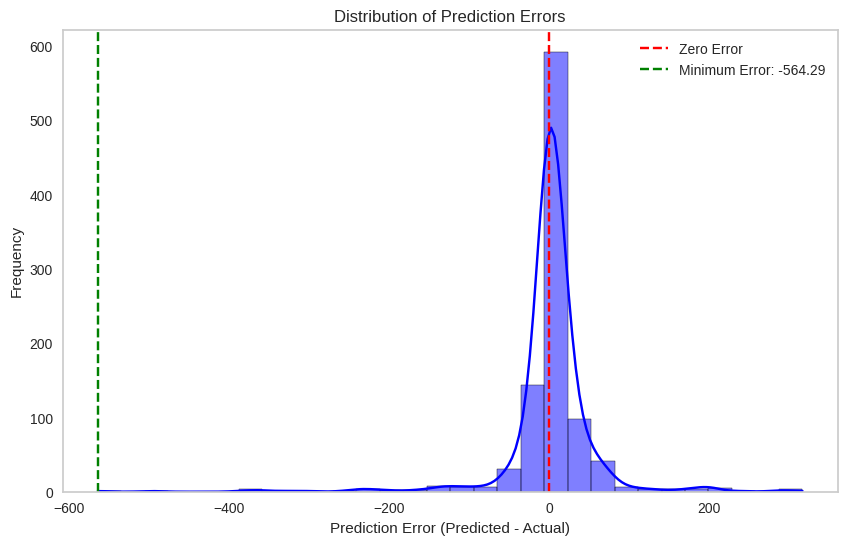

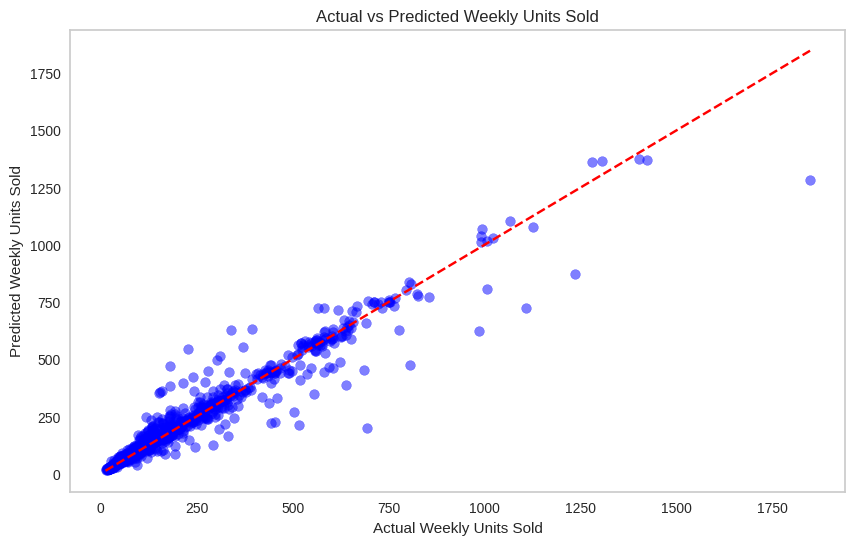

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
tpot_data = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')  # Adjust the path as necessary

# Feature Engineering
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])  # Convert Date to datetime
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
tpot_data['Is_Holiday'] = tpot_data['Is_Holiday'].astype(int)  # Ensure Is_Holiday is an int

# One-hot encoding for categorical features
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)

# Drop the original Date column and the target column
tpot_data.drop(columns=['Date'], inplace=True)

# Define features and target variable
features = tpot_data.drop(columns=['Weekly_Units_Sold'])  # Drop target column
target = tpot_data['Weekly_Units_Sold']  # Target column

# Split the dataset into training and testing sets
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, target, random_state=42)

# Initialize the Random Forest model
exported_pipeline = RandomForestRegressor(
    bootstrap=True,
    max_features=0.9,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42  # Fix random state for reproducibility
)

# Fit the model
exported_pipeline.fit(training_features, training_target)

# Make predictions
results = exported_pipeline.predict(testing_features)

# Evaluate the model's performance using various metrics
mse = mean_squared_error(testing_target, results)  # Calculate Mean Squared Error
mae = mean_absolute_error(testing_target, results)  # Calculate Mean Absolute Error
r2 = r2_score(testing_target, results)  # Calculate R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)  # Print Mean Squared Error
print("Mean Absolute Error:", mae)  # Print Mean Absolute Error
print("R² Score:", r2)  # Print R² Score, indicating how well the model explains the variability in the data

# Calculate the prediction errors
errors = results - testing_target  # Calculate the difference between predicted and actual values

# Plotting the distribution of prediction errors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with Kernel Density Estimate
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error for reference

# Highlighting the minimum error
min_error = np.min(errors)  # Find the minimum error
plt.axvline(min_error, color='green', linestyle='--', label='Minimum Error: {:.2f}'.format(min_error))  # Line for minimum error

# Add title and labels to the plot
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show the legend
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(testing_target, results, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Weekly Units Sold')  # Title of the plot
plt.xlabel('Actual Weekly Units Sold')  # X-axis label
plt.ylabel('Predicted Weekly Units Sold')  # Y-axis label
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot


### **Sales_Product_Price_by_Store**

In [10]:
import pandas as pd
from pycaret.regression import *

# Load the dataset
df = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')

# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Is_Holiday'] = df['Is_Holiday'].astype(int)

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Store', 'Product'], drop_first=True)

# Convert boolean columns to integer (0 and 1)
bool_columns = ['Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
                'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3']
df[bool_columns] = df[bool_columns].astype(int)

# Drop the original Date column
df.drop(columns=['Date'], inplace=True)

# Print the columns to verify
print("Columns in DataFrame:", df.columns.tolist())

# Initialize the PyCaret environment
exp = setup(data=df, target='Weekly_Units_Sold', session_id=42,
            categorical_features=bool_columns,
            numeric_features=['Is_Holiday', 'Base Price', 'Price', 'Year',
                             'Month', 'Day', 'Weekday'])

# Compare models and select the best one
best_model = compare_models()

# Get the best model's name and parameters
model_name = best_model.__class__.__name__
model_params = best_model.get_params()
print(f"Best Model: {model_name}")
print("Model Parameters:")
print(model_params)


# Make predictions on the dataset
predictions = predict_model(best_model)

# Display the predictions
print(predictions[['prediction_label', 'Weekly_Units_Sold']])  # Adjust as needed


Columns in DataFrame: ['Is_Holiday', 'Base Price', 'Price', 'Weekly_Units_Sold', 'Year', 'Month', 'Day', 'Weekday', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3']


,Description,Value
0,Session id,42
1,Target,Weekly_Units_Sold
2,Target type,Regression
3,Original data shape,"(3861, 18)"
4,Transformed data shape,"(3861, 18)"
5,Transformed train set shape,"(2702, 18)"
6,Transformed test set shape,"(1159, 18)"
7,Numeric features,7
8,Categorical features,10
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,23.9129,3083.4979,55.1209,0.9458,0.1923,0.1245,0.6500
xgboost,Extreme Gradient Boosting,24.9082,4012.2341,59.8745,0.9291,0.2689,0.1553,0.2090
lightgbm,Light Gradient Boosting Machine,33.1871,4862.0505,68.6382,0.9170,0.3062,0.1945,1.1960
rf,Random Forest Regressor,29.1148,5742.2999,72.3599,0.8985,0.2145,0.1500,1.0010
gbr,Gradient Boosting Regressor,43.3534,8940.7264,92.5522,0.8489,0.3999,0.2738,0.5180
dt,Decision Tree Regressor,34.7209,8744.6788,90.6838,0.8434,0.2717,0.1785,0.1440
ridge,Ridge Regression,100.1072,22396.0512,148.6051,0.6169,0.7750,0.8840,0.1380
br,Bayesian Ridge,100.0230,22396.5543,148.6039,0.6169,0.7750,0.8813,0.2420
lar,Least Angle Regression,100.2353,22397.4957,148.6150,0.6168,0.7774,0.8880,0.1410
lr,Linear Regression,100.2353,22397.4957,148.6150,0.6168,0.7774,0.8880,0.8460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Best Model: ExtraTreesRegressor
Model Parameters:
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,23.0951,2709.9855,52.0575,0.9463,0.1947,0.1214


      prediction_label  Weekly_Units_Sold
2424            284.99                261
3290             69.11                 66
2575            113.55                138
2042             82.75                 89
3717            568.60                558
...                ...                ...
1151             18.93                 29
2381            344.79                318
1053            111.52                118
3204            233.31                224
22              144.64                118

[1159 rows x 2 columns]


In [ ]:
# !pip install scikit-learn==0.23.2

### **Loan Dataset**

In [11]:
import pandas as pd
from pycaret.classification import *



# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
data = pd.read_csv('/content/loan_data.csv')  # Adjust the path as necessary

# Display the data types and structure
print(data.info())

# Initialize the PyCaret environment
# Specify the target variable as 'not.fully.paid'
exp = setup(data=data, target='not.fully.paid', session_id=42,
            categorical_features=['purpose'],
            numeric_features=['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                             'dti', 'fico', 'days.with.cr.line', 'revol.bal',
                             'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])
            # Remove silent=True

# Compare baseline models
best_model = compare_models()

# Finalize the best model for predictions
final_model = finalize_model(best_model)

# Make predictions on the entire dataset (or new data)
predictions = predict_model(final_model)

# Display the predictions
print(predictions[['prediction_label', 'not.fully.paid']])  # Adjust as necessary based on your column names

# Evaluate the model performance
evaluate_model(final_model)

# # Optionally save the model
# save_model(final_model, 'best_model')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


,Description,Value
0,Session id,42
1,Target,not.fully.paid
2,Target type,Binary
3,Original data shape,"(9578, 14)"
4,Transformed data shape,"(9578, 20)"
5,Transformed train set shape,"(6704, 20)"
6,Transformed test set shape,"(2874, 20)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8399,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780
ridge,Ridge Classifier,0.8396,0.6838,0.0084,0.2750,0.0162,0.0105,0.0325,0.0800
gbc,Gradient Boosting Classifier,0.8395,0.6787,0.0336,0.4775,0.0625,0.0426,0.0919,1.5610
lr,Logistic Regression,0.8391,0.6721,0.0242,0.4333,0.0456,0.0298,0.0706,0.5430
ada,Ada Boost Classifier,0.8385,0.6734,0.0429,0.4697,0.0779,0.0518,0.1002,0.4030
rf,Random Forest Classifier,0.8382,0.6519,0.0214,0.4126,0.0405,0.0246,0.0611,1.4940
lda,Linear Discriminant Analysis,0.8376,0.6840,0.0475,0.4378,0.0851,0.0555,0.0993,0.0840
et,Extra Trees Classifier,0.8361,0.6407,0.0345,0.3743,0.0628,0.0367,0.0707,0.9400
lightgbm,Light Gradient Boosting Machine,0.8349,0.6521,0.0559,0.3970,0.0978,0.0601,0.0972,1.8050
xgboost,Extreme Gradient Boosting,0.8247,0.6204,0.0885,0.3321,0.1387,0.0758,0.0974,0.2830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.8399,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


      prediction_label  not.fully.paid
1102                 0               0
5350                 0               0
3323                 0               0
2147                 0               0
7471                 0               0
...                ...             ...
3196                 0               0
7981                 0               0
271                  0               1
3259                 0               0
466                  0               0

[2874 rows x 2 columns]


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit.policy', 'int.rate',
                                              'installment', 'log.annual.inc',
                                              'dti', 'fico', 'days.with.cr.line',
                                              'revol.bal', 'revol.util',
                                              'inq.last.6mths', 'delinq.2yrs',
                                              'pub.rec'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fe...
                                                               drop_invariant=False,
                     

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Parameters').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

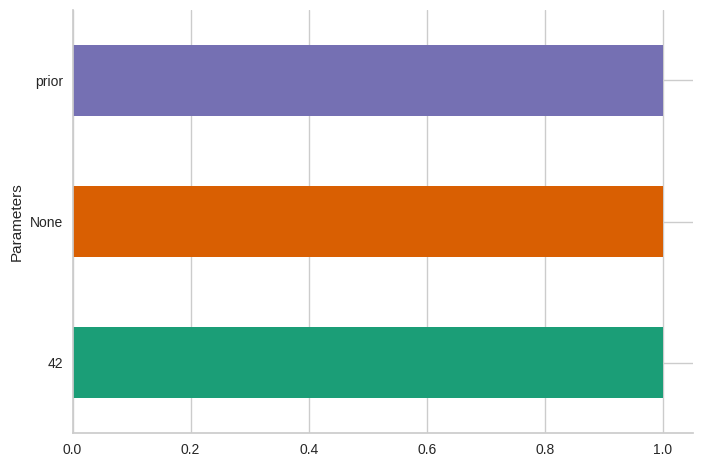

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Parameters').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)